In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from zipfile import ZipFile
import pandas as pd
with ZipFile('/content/drive/MyDrive/store-sales-time-series-forecasting.zip', 'r') as zipObj:
   # Get list of files names in zip
   listOfiles = zipObj.namelist()
   # Iterate over the list of file names in given list & print them
   for elem in listOfiles:
       print(elem)

holidays_events.csv
oil.csv
sample_submission.csv
stores.csv
test.csv
train.csv
transactions.csv


In [3]:
zip_file=ZipFile('/content/drive/MyDrive/store-sales-time-series-forecasting.zip')
data_holiday=pd.read_csv(zip_file.open('holidays_events.csv'))
data_oil=pd.read_csv(zip_file.open('oil.csv'))
data_stores=pd.read_csv(zip_file.open('stores.csv'))
data_train=pd.read_csv(zip_file.open('train.csv'))
data_transactions=pd.read_csv(zip_file.open('transactions.csv'))
data_test=pd.read_csv(zip_file.open('test.csv'))

In [4]:
data_holiday.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [5]:
data_oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [ ]:
data_stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [ ]:
data_train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


[Text(0, 0, 'Azuay'),
 Text(1, 0, 'Bolivar'),
 Text(2, 0, 'Chimborazo'),
 Text(3, 0, 'Cotopaxi'),
 Text(4, 0, 'El Oro'),
 Text(5, 0, 'Esmeraldas'),
 Text(6, 0, 'Guayas'),
 Text(7, 0, 'Imbabura'),
 Text(8, 0, 'Loja'),
 Text(9, 0, 'Los Rios'),
 Text(10, 0, 'Manabi'),
 Text(11, 0, 'Pastaza'),
 Text(12, 0, 'Pichincha'),
 Text(13, 0, 'Santa Elena'),
 Text(14, 0, 'Santo Domingo de los Tsachilas'),
 Text(15, 0, 'Tungurahua')]

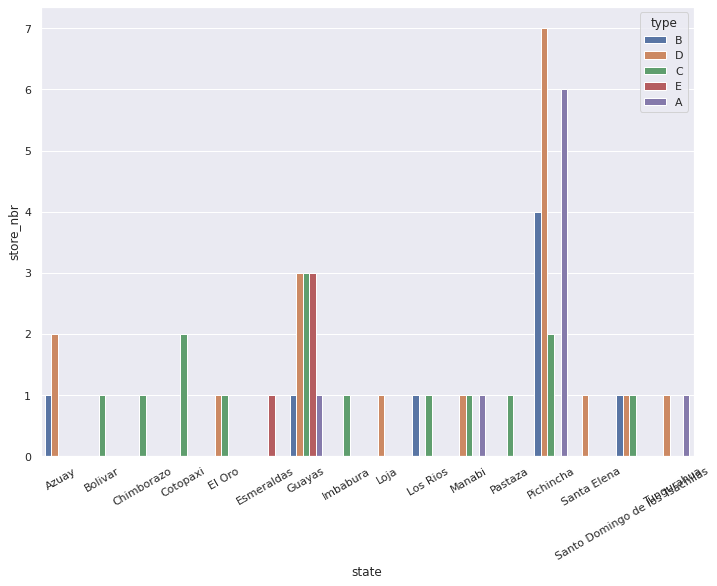

In [372]:
import seaborn as sns
df_stores = data_stores.groupby(["state","type"])['store_nbr'].count()
df_stores = df_stores.reset_index()
# plot barplot
sns.set(rc={'figure.figsize':(11.7,8.27)})
g=sns.barplot(x="state",
           y="store_nbr",
           hue="type",
           data=df_stores)
g.set_xticklabels(g.get_xticklabels(), rotation=30)


In [ ]:
# states Guayas and Pichinacha has highest no of all types of stores. so i want to check how many cities does each state have to have an idea about size states and number of stores present 
#store of type E are present just in two states Guayas and Esmeralds and are just four in numbers so i will like to check which category of products does these stores sell.

[Text(0, 0, 'Azuay'),
 Text(1, 0, 'Bolivar'),
 Text(2, 0, 'Chimborazo'),
 Text(3, 0, 'Cotopaxi'),
 Text(4, 0, 'El Oro'),
 Text(5, 0, 'Esmeraldas'),
 Text(6, 0, 'Guayas'),
 Text(7, 0, 'Imbabura'),
 Text(8, 0, 'Loja'),
 Text(9, 0, 'Los Rios'),
 Text(10, 0, 'Manabi'),
 Text(11, 0, 'Pastaza'),
 Text(12, 0, 'Pichincha'),
 Text(13, 0, 'Santa Elena'),
 Text(14, 0, 'Santo Domingo de los Tsachilas'),
 Text(15, 0, 'Tungurahua')]

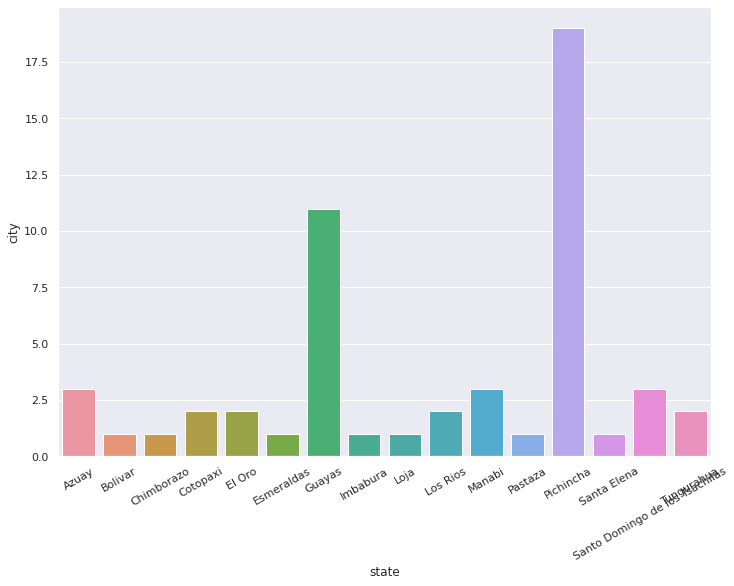

In [ ]:
df_stores = data_stores.groupby(["state"])['city'].count()
df_stores = df_stores.reset_index()
df_stores.head()
# plot barplot
sns.set(rc={'figure.figsize':(11.7,8.27)})
g=sns.barplot(x="state",
           y="city",
           data=df_stores)
g.set_xticklabels(g.get_xticklabels(), rotation=30)
# from this graph we see states with larger no of cities have more stores i will verify it further

<ipython-input-12-75e98ff17f46>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_stores = data_stores.groupby(["state"])['city','store_nbr'].count()


[Text(0.5, 0, 'No of cities'), Text(0, 0.5, 'No of stores')]

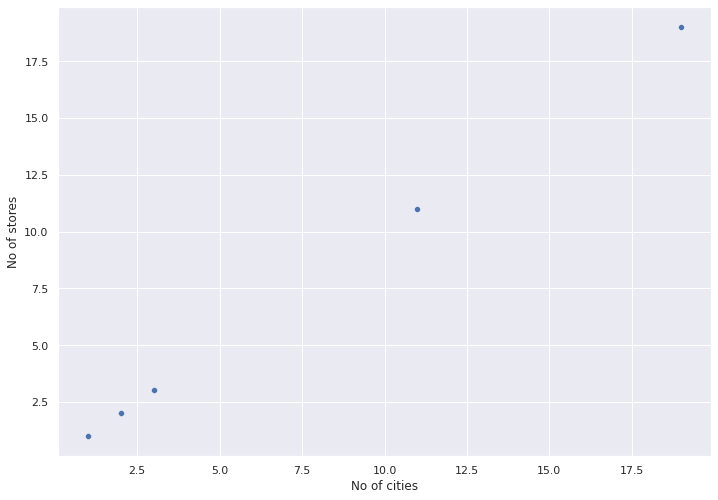

In [ ]:
df_stores = data_stores.groupby(["state"])['city','store_nbr'].count()
df_stores = df_stores.reset_index()
# plot barplot
sns.set(rc={'figure.figsize':(11.7,8.27)})
g=sns.scatterplot(data=df_stores,x="city",
           y="store_nbr")
g.set(xlabel ="No of cities", ylabel = "No of stores")
# so we see a linear trend in no of stores and no of cities

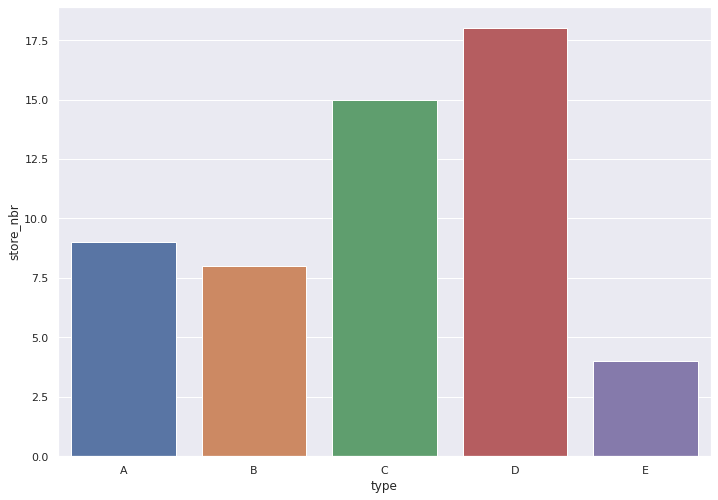

In [ ]:
# stores of type C and D are major type of stores present in all states
df_stores = data_stores.groupby(["type"])['store_nbr'].count()
df_stores = df_stores.reset_index()
df_stores.head()
# plot barplot
sns.set(rc={'figure.figsize':(11.7,8.27)})
g=sns.barplot(x="type",
           y="store_nbr",
           data=df_stores)


In [ ]:
#now i want to see categories of various products in all type of stores
data_train.head()
df=data_train[['store_nbr','family']]
df.drop_duplicates(inplace=True)

<ipython-input-7-79b652e81c2c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


In [ ]:
import numpy as np
df_new=pd.merge(data_stores,df,how='right',on='store_nbr')
m=df_new.family.unique()
# out of all products that are not sold by various stores
store_a=np.setdiff1d(m,df_new[df_new['type']=='A'].family.unique())
print(store_a)
store_b=np.setdiff1d(m,df_new[df_new['type']=='B'].family.unique())
print(store_b)
store_c=np.setdiff1d(m,df_new[df_new['type']=='C'].family.unique())
print(store_c)
store_d=np.setdiff1d(m,df_new[df_new['type']=='D'].family.unique())
print(store_d)
store_e=np.setdiff1d(m,df_new[df_new['type']=='E'].family.unique())
print(store_e)
#All stores are selling all types of products so different type of stores may have different type of promotions or may differ in other ways

[]
[]
[]
[]
[]


In [5]:
data_train["date"] = pd.to_datetime(data_train["date"])
# set the new datetime column as the index
data_train = data_train.set_index("date")
data_train.drop(['id'],axis=1,inplace=True)
# create new columns from datetime index
data_train["year"] = data_train.index.year
data_train["month"] = data_train.index.month
data_train["day"] = data_train.index.day
# new dataframe
data_train.head()


,store_nbr,family,sales,onpromotion,year,month,day
date,,,,,,,
2013-01-01,1,AUTOMOTIVE,0.0,0,2013,1,1
2013-01-01,1,BABY CARE,0.0,0,2013,1,1
2013-01-01,1,BEAUTY,0.0,0,2013,1,1
2013-01-01,1,BEVERAGES,0.0,0,2013,1,1
2013-01-01,1,BOOKS,0.0,0,2013,1,1


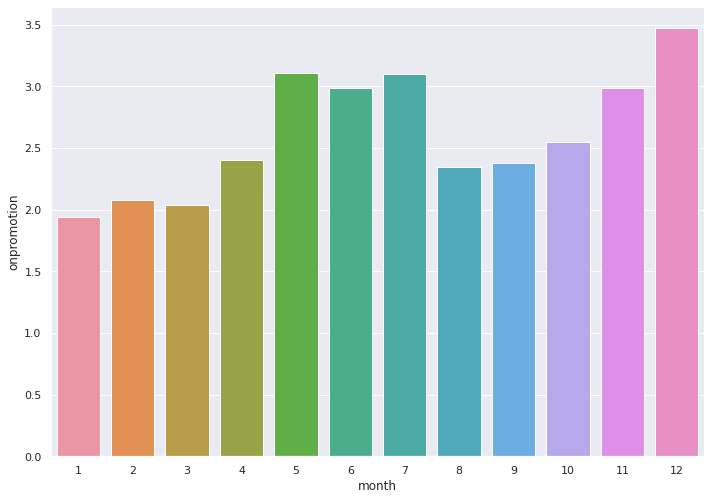

In [ ]:
df=data_train.groupby(['month'])["onpromotion"].mean()
df = df.reset_index()
# plot barplot
sns.set(rc={'figure.figsize':(11.7,8.27)})
g=sns.barplot(x="month",
           y="onpromotion",
           data=df)

#average item on promotion is high in summer, nov and dec

[Text(0, 0, 'AUTOMOTIVE'),
 Text(1, 0, 'BABY CARE'),
 Text(2, 0, 'BEAUTY'),
 Text(3, 0, 'BEVERAGES'),
 Text(4, 0, 'BOOKS'),
 Text(5, 0, 'BREAD/BAKERY'),
 Text(6, 0, 'CELEBRATION'),
 Text(7, 0, 'CLEANING'),
 Text(8, 0, 'DAIRY'),
 Text(9, 0, 'DELI'),
 Text(10, 0, 'EGGS'),
 Text(11, 0, 'FROZEN FOODS'),
 Text(12, 0, 'GROCERY I'),
 Text(13, 0, 'GROCERY II'),
 Text(14, 0, 'HARDWARE'),
 Text(15, 0, 'HOME AND KITCHEN I'),
 Text(16, 0, 'HOME AND KITCHEN II'),
 Text(17, 0, 'HOME APPLIANCES'),
 Text(18, 0, 'HOME CARE'),
 Text(19, 0, 'LADIESWEAR'),
 Text(20, 0, 'LAWN AND GARDEN'),
 Text(21, 0, 'LINGERIE'),
 Text(22, 0, 'LIQUOR,WINE,BEER'),
 Text(23, 0, 'MAGAZINES'),
 Text(24, 0, 'MEATS'),
 Text(25, 0, 'PERSONAL CARE'),
 Text(26, 0, 'PET SUPPLIES'),
 Text(27, 0, 'PLAYERS AND ELECTRONICS'),
 Text(28, 0, 'POULTRY'),
 Text(29, 0, 'PREPARED FOODS'),
 Text(30, 0, 'PRODUCE'),
 Text(31, 0, 'SCHOOL AND OFFICE SUPPLIES'),
 Text(32, 0, 'SEAFOOD')]

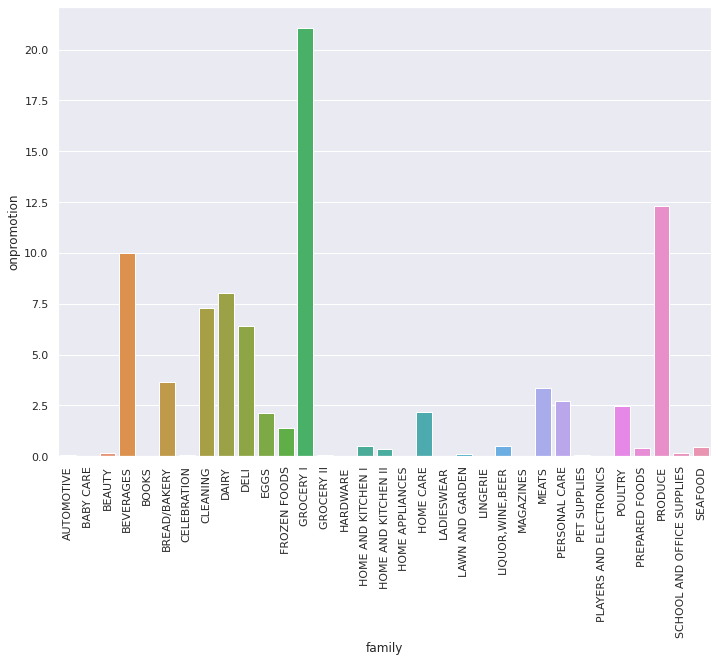

In [ ]:
df=data_train.groupby(['family'])["onpromotion"].mean()
df = df.reset_index()
# plot barplot
sns.set(rc={'figure.figsize':(11.7,8.27)})
g=sns.barplot(x="family",
           y="onpromotion",
           data=df)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

[Text(0, 0, 'AUTOMOTIVE'),
 Text(1, 0, 'BABY CARE'),
 Text(2, 0, 'BEAUTY'),
 Text(3, 0, 'BEVERAGES'),
 Text(4, 0, 'BOOKS'),
 Text(5, 0, 'BREAD/BAKERY'),
 Text(6, 0, 'CELEBRATION'),
 Text(7, 0, 'CLEANING'),
 Text(8, 0, 'DAIRY'),
 Text(9, 0, 'DELI'),
 Text(10, 0, 'EGGS'),
 Text(11, 0, 'FROZEN FOODS'),
 Text(12, 0, 'GROCERY I'),
 Text(13, 0, 'GROCERY II'),
 Text(14, 0, 'HARDWARE'),
 Text(15, 0, 'HOME AND KITCHEN I'),
 Text(16, 0, 'HOME AND KITCHEN II'),
 Text(17, 0, 'HOME APPLIANCES'),
 Text(18, 0, 'HOME CARE'),
 Text(19, 0, 'LADIESWEAR'),
 Text(20, 0, 'LAWN AND GARDEN'),
 Text(21, 0, 'LINGERIE'),
 Text(22, 0, 'LIQUOR,WINE,BEER'),
 Text(23, 0, 'MAGAZINES'),
 Text(24, 0, 'MEATS'),
 Text(25, 0, 'PERSONAL CARE'),
 Text(26, 0, 'PET SUPPLIES'),
 Text(27, 0, 'PLAYERS AND ELECTRONICS'),
 Text(28, 0, 'POULTRY'),
 Text(29, 0, 'PREPARED FOODS'),
 Text(30, 0, 'PRODUCE'),
 Text(31, 0, 'SCHOOL AND OFFICE SUPPLIES'),
 Text(32, 0, 'SEAFOOD')]

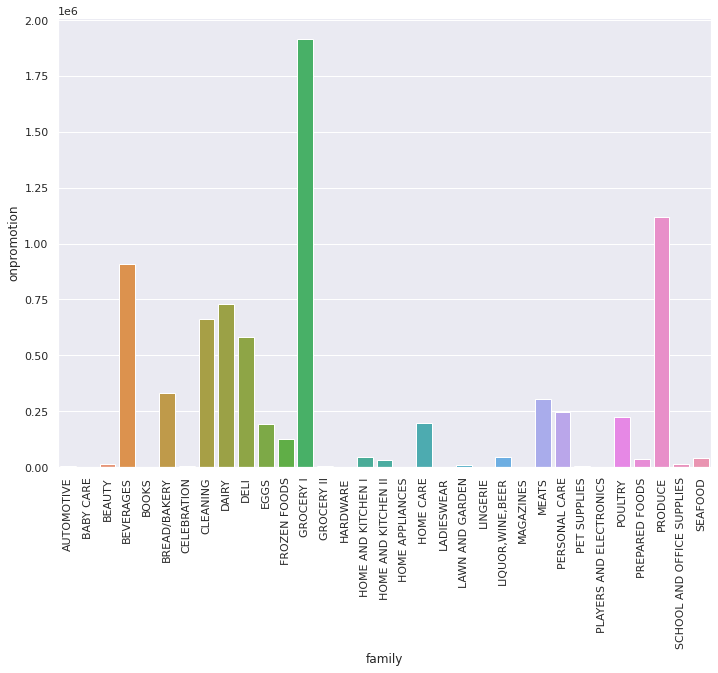

In [ ]:
df=data_train.groupby(['family'])["onpromotion"].sum()
df = df.reset_index()
# plot barplot
sns.set(rc={'figure.figsize':(11.7,8.27)})
g=sns.barplot(x="family",
           y="onpromotion",
           data=df)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
#perichable goods and groceries has heights no of articles in sales

[Text(0, 0, 'AUTOMOTIVE'),
 Text(1, 0, 'BABY CARE'),
 Text(2, 0, 'BEAUTY'),
 Text(3, 0, 'BEVERAGES'),
 Text(4, 0, 'BOOKS'),
 Text(5, 0, 'BREAD/BAKERY'),
 Text(6, 0, 'CELEBRATION'),
 Text(7, 0, 'CLEANING'),
 Text(8, 0, 'DAIRY'),
 Text(9, 0, 'DELI'),
 Text(10, 0, 'EGGS'),
 Text(11, 0, 'FROZEN FOODS'),
 Text(12, 0, 'GROCERY I'),
 Text(13, 0, 'GROCERY II'),
 Text(14, 0, 'HARDWARE'),
 Text(15, 0, 'HOME AND KITCHEN I'),
 Text(16, 0, 'HOME AND KITCHEN II'),
 Text(17, 0, 'HOME APPLIANCES'),
 Text(18, 0, 'HOME CARE'),
 Text(19, 0, 'LADIESWEAR'),
 Text(20, 0, 'LAWN AND GARDEN'),
 Text(21, 0, 'LINGERIE'),
 Text(22, 0, 'LIQUOR,WINE,BEER'),
 Text(23, 0, 'MAGAZINES'),
 Text(24, 0, 'MEATS'),
 Text(25, 0, 'PERSONAL CARE'),
 Text(26, 0, 'PET SUPPLIES'),
 Text(27, 0, 'PLAYERS AND ELECTRONICS'),
 Text(28, 0, 'POULTRY'),
 Text(29, 0, 'PREPARED FOODS'),
 Text(30, 0, 'PRODUCE'),
 Text(31, 0, 'SCHOOL AND OFFICE SUPPLIES'),
 Text(32, 0, 'SEAFOOD')]

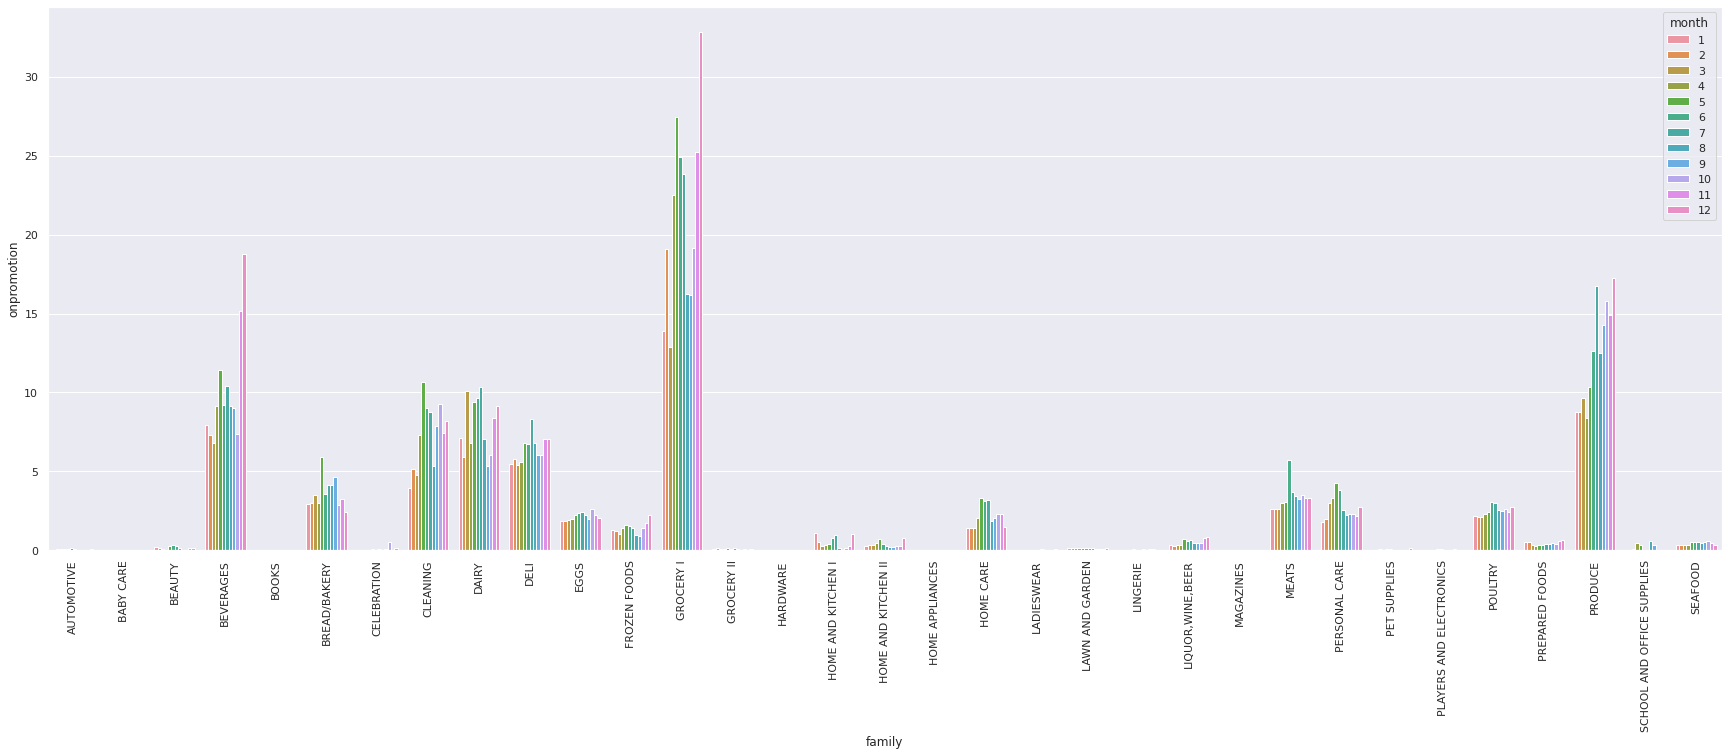

In [ ]:
df=data_train.groupby(['family','month'])["onpromotion"].mean()
df = df.reset_index()
# plot barplot
sns.set(rc={'figure.figsize':(30,10)})
g=sns.barplot(x="family",
           y="onpromotion",hue='month',
           data=df)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

[Text(0, 0, 'AUTOMOTIVE'),
 Text(1, 0, 'BABY CARE'),
 Text(2, 0, 'BEAUTY'),
 Text(3, 0, 'BEVERAGES'),
 Text(4, 0, 'BOOKS'),
 Text(5, 0, 'BREAD/BAKERY'),
 Text(6, 0, 'CELEBRATION'),
 Text(7, 0, 'CLEANING'),
 Text(8, 0, 'DAIRY'),
 Text(9, 0, 'DELI'),
 Text(10, 0, 'EGGS'),
 Text(11, 0, 'FROZEN FOODS'),
 Text(12, 0, 'GROCERY I'),
 Text(13, 0, 'GROCERY II'),
 Text(14, 0, 'HARDWARE'),
 Text(15, 0, 'HOME AND KITCHEN I'),
 Text(16, 0, 'HOME AND KITCHEN II'),
 Text(17, 0, 'HOME APPLIANCES'),
 Text(18, 0, 'HOME CARE'),
 Text(19, 0, 'LADIESWEAR'),
 Text(20, 0, 'LAWN AND GARDEN'),
 Text(21, 0, 'LINGERIE'),
 Text(22, 0, 'LIQUOR,WINE,BEER'),
 Text(23, 0, 'MAGAZINES'),
 Text(24, 0, 'MEATS'),
 Text(25, 0, 'PERSONAL CARE'),
 Text(26, 0, 'PET SUPPLIES'),
 Text(27, 0, 'PLAYERS AND ELECTRONICS'),
 Text(28, 0, 'POULTRY'),
 Text(29, 0, 'PREPARED FOODS'),
 Text(30, 0, 'PRODUCE'),
 Text(31, 0, 'SCHOOL AND OFFICE SUPPLIES'),
 Text(32, 0, 'SEAFOOD')]

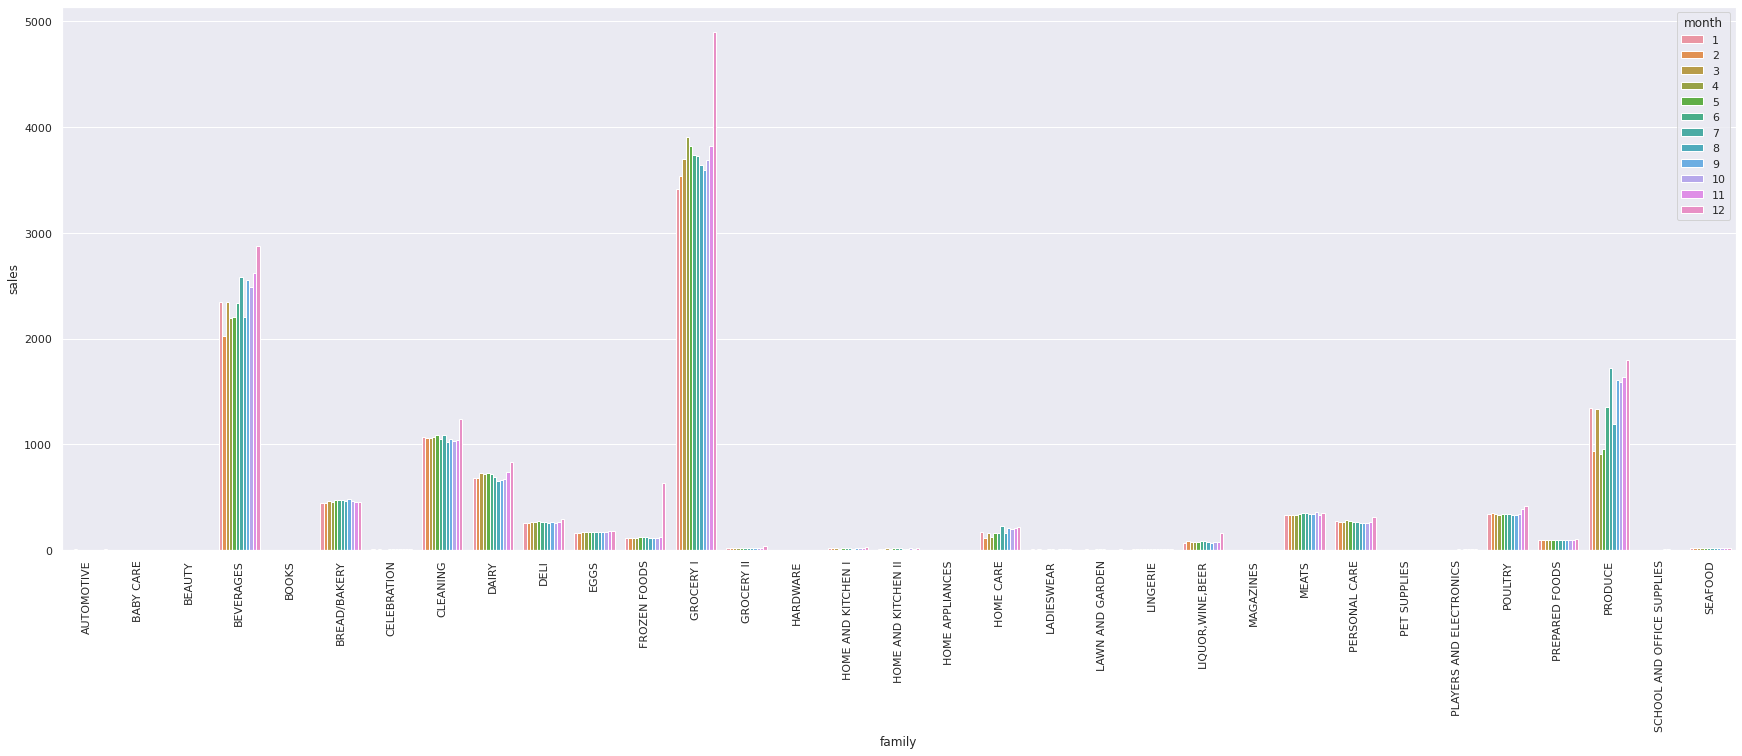

In [ ]:
df=data_train.groupby(['family','month'])["sales"].mean()
df = df.reset_index()
# plot barplot
sns.set(rc={'figure.figsize':(30,10)})
g=sns.barplot(x="family",
           y="sales",hue='month',
           data=df)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
# we see that average sales of products and onpromotions per month do have same pattern for family of products
#december is the month when maximum no of products are on promotions

In [6]:
#now i want to check how average items on promotions differ with type of stores
data_train=data_train.reset_index()
df_type=pd.merge(data_stores,data_train,how='right',on='store_nbr')
df_type.head()

,store_nbr,city,state,type,cluster,date,family,sales,onpromotion,year,month,day
0,1,Quito,Pichincha,D,13,2013-01-01,AUTOMOTIVE,0.0,0,2013,1,1
1,1,Quito,Pichincha,D,13,2013-01-01,BABY CARE,0.0,0,2013,1,1
2,1,Quito,Pichincha,D,13,2013-01-01,BEAUTY,0.0,0,2013,1,1
3,1,Quito,Pichincha,D,13,2013-01-01,BEVERAGES,0.0,0,2013,1,1
4,1,Quito,Pichincha,D,13,2013-01-01,BOOKS,0.0,0,2013,1,1


In [7]:
# store number uniquely represent a store in a city, state and type so i will drop these columns
# i want to check the impact of oil price, promotions and item family on sales in this panel data
data_oil['date']=pd.to_datetime(data_oil.date)
df_final = pd.merge(df_type,data_oil,how='left',on='date')

[Text(0, 0, 'A'),
 Text(1, 0, 'B'),
 Text(2, 0, 'C'),
 Text(3, 0, 'D'),
 Text(4, 0, 'E')]

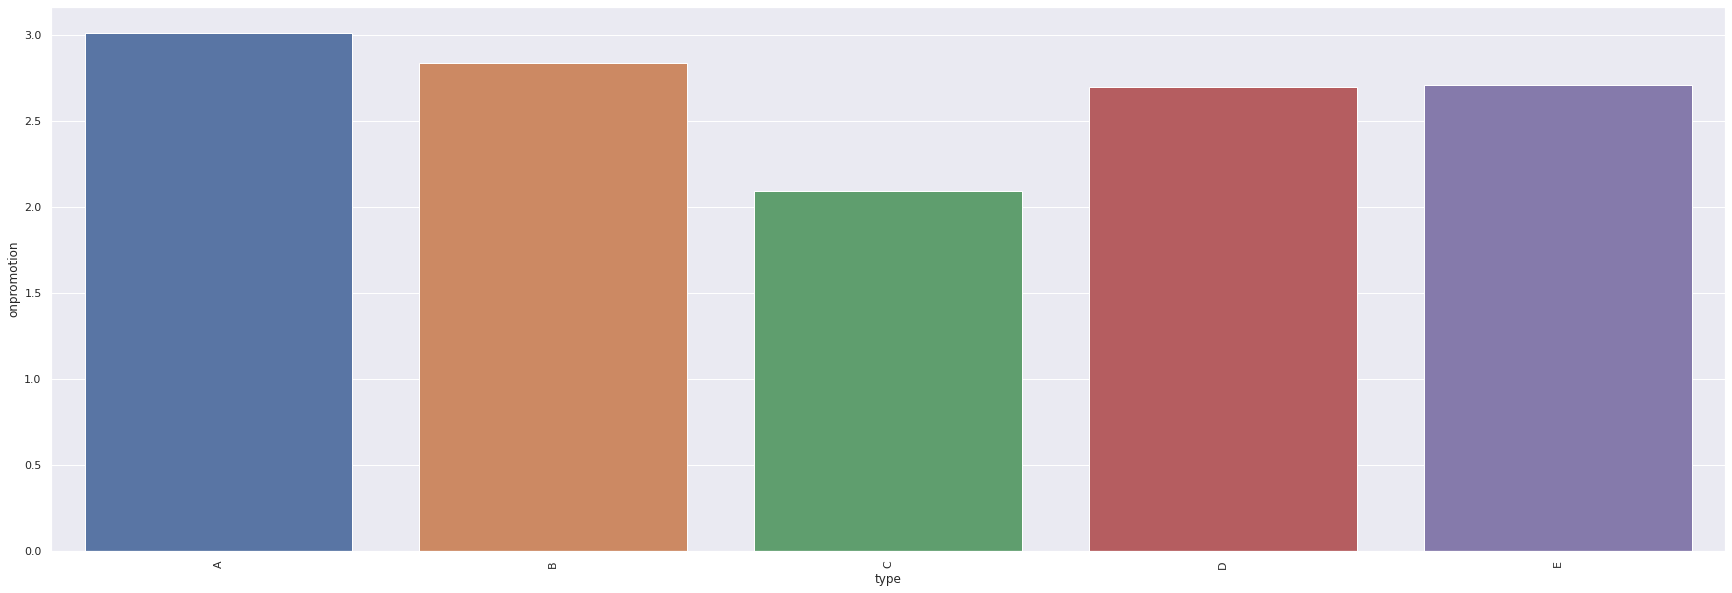

In [ ]:
df=df_type.groupby(['type']).agg({'onpromotion':['mean']})
df.columns = df.columns.droplevel(1)
sns.set(rc={'figure.figsize':(30,10)})
g=sns.barplot(x=df.index,
           y="onpromotion",
           data=df)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
#c type stores has least average items  on promotions. so promotions does change with type of stores


[Text(0, 0, 'A'),
 Text(1, 0, 'B'),
 Text(2, 0, 'C'),
 Text(3, 0, 'D'),
 Text(4, 0, 'E')]

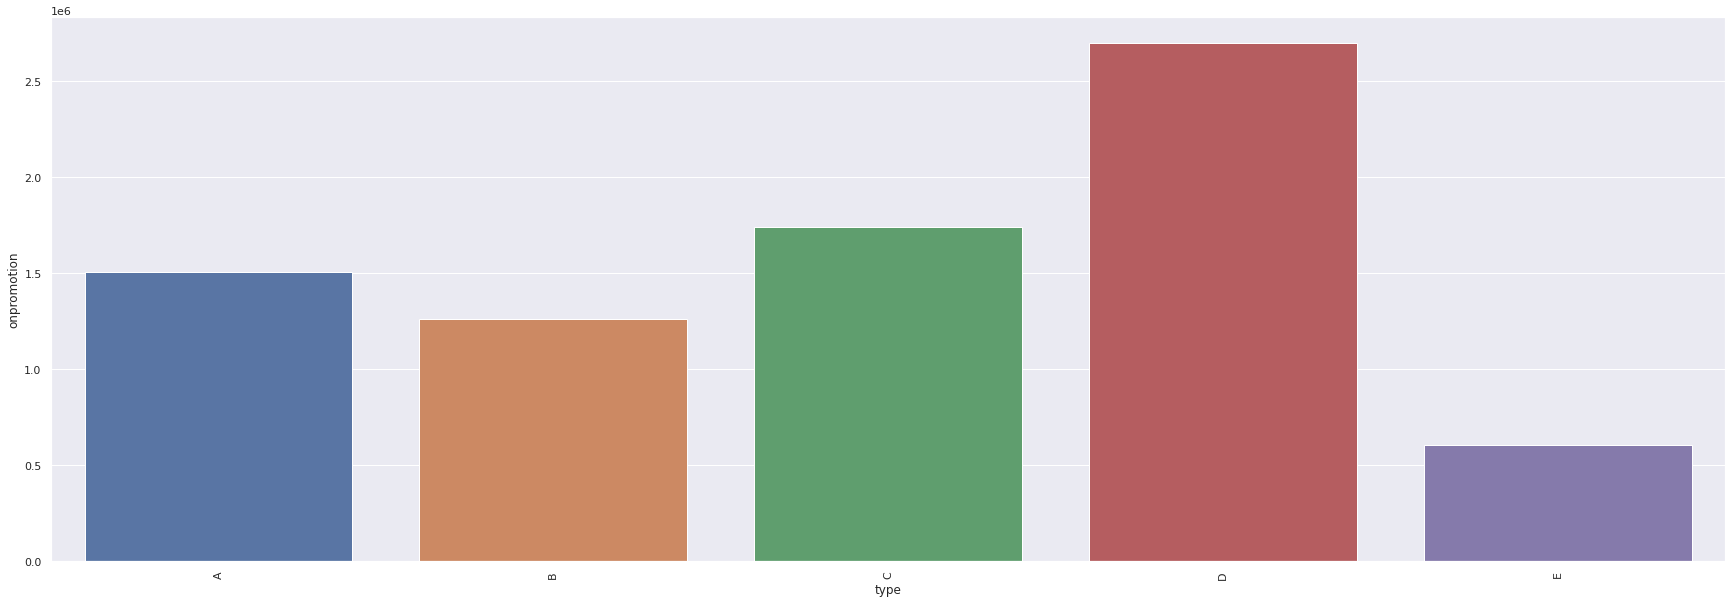

In [ ]:
df=df_type.groupby(['type']).agg({'onpromotion':['sum']})
df.columns = df.columns.droplevel(1)
sns.set(rc={'figure.figsize':(30,10)})
g=sns.barplot(x=df.index,
           y="onpromotion",
           data=df)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
#it is not giving a clear picture as we have different no for different type of stores

In [ ]:
df_type.head()

,store_nbr,city,state,type,cluster,date,family,sales,onpromotion,year,month,day
0,1,Quito,Pichincha,D,13,2013-01-01,AUTOMOTIVE,0.0,0,2013,1,1
1,1,Quito,Pichincha,D,13,2013-01-01,BABY CARE,0.0,0,2013,1,1
2,1,Quito,Pichincha,D,13,2013-01-01,BEAUTY,0.0,0,2013,1,1
3,1,Quito,Pichincha,D,13,2013-01-01,BEVERAGES,0.0,0,2013,1,1
4,1,Quito,Pichincha,D,13,2013-01-01,BOOKS,0.0,0,2013,1,1


In [ ]:
df_final.dtypes

store_nbr               int64
city                   object
state                  object
type                   object
cluster                 int64
date           datetime64[ns]
family                 object
sales                 float64
onpromotion             int64
year                    int64
month                   int64
day                     int64
dcoilwtico            float64
dtype: object

In [10]:
df_final.tail()

,store_nbr,city,state,type,cluster,date,family,sales,onpromotion,year,month,day,dcoilwtico
3000883,9,Quito,Pichincha,B,6,2017-08-15,POULTRY,438.133,0,2017,8,15,47.57
3000884,9,Quito,Pichincha,B,6,2017-08-15,PREPARED FOODS,154.553,1,2017,8,15,47.57
3000885,9,Quito,Pichincha,B,6,2017-08-15,PRODUCE,2419.729,148,2017,8,15,47.57
3000886,9,Quito,Pichincha,B,6,2017-08-15,SCHOOL AND OFFICE SUPPLIES,121.000,8,2017,8,15,47.57
3000887,9,Quito,Pichincha,B,6,2017-08-15,SEAFOOD,16.000,0,2017,8,15,47.57


In [8]:
df_final.drop(columns=['city','state','type','cluster','year','month','day'],axis=1, inplace=True)

In [9]:
df_final.head()

,store_nbr,date,family,sales,onpromotion,dcoilwtico
0,1,2013-01-01,AUTOMOTIVE,0.0,0,NaN
1,1,2013-01-01,BABY CARE,0.0,0,NaN
2,1,2013-01-01,BEAUTY,0.0,0,NaN
3,1,2013-01-01,BEVERAGES,0.0,0,NaN
4,1,2013-01-01,BOOKS,0.0,0,NaN


In [10]:
df_final.isna().sum()

store_nbr           0
date                0
family              0
sales               0
onpromotion         0
dcoilwtico     928422
dtype: int64

In [11]:
df_final[df_final['date']=='2013-01-01'].shape

(1782, 6)

In [12]:
p=df_final['dcoilwtico'].dropna().mean()
print(p)

67.92558899398117


In [13]:
df_final['dcoilwtico'].fillna(value=p,inplace=True)

In [14]:
df_final.isna().sum()

store_nbr      0
date           0
family         0
sales          0
onpromotion    0
dcoilwtico     0
dtype: int64

In [15]:
df_final.head()

,store_nbr,date,family,sales,onpromotion,dcoilwtico
0,1,2013-01-01,AUTOMOTIVE,0.0,0,67.925589
1,1,2013-01-01,BABY CARE,0.0,0,67.925589
2,1,2013-01-01,BEAUTY,0.0,0,67.925589
3,1,2013-01-01,BEVERAGES,0.0,0,67.925589
4,1,2013-01-01,BOOKS,0.0,0,67.925589


<Axes: xlabel='onpromotion', ylabel='sales'>

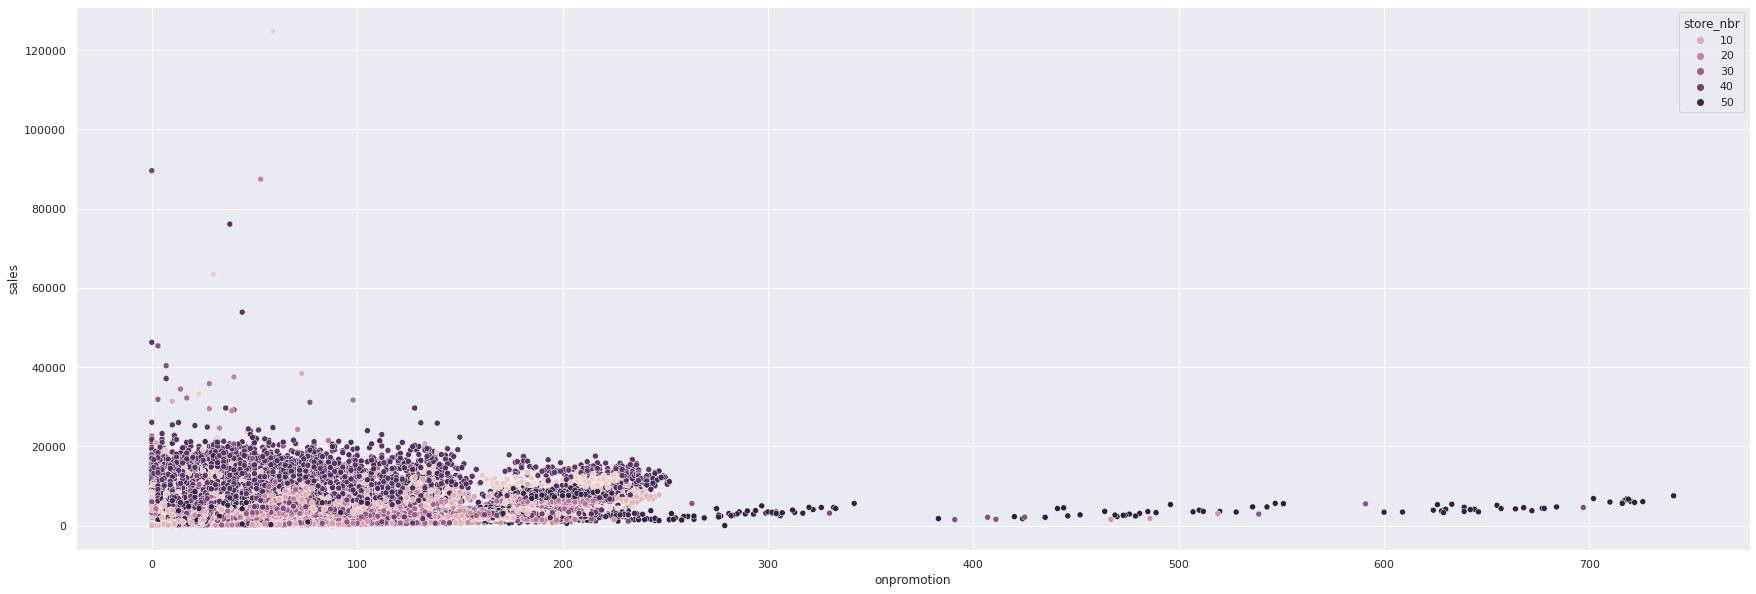

In [ ]:
sns.scatterplot(x=df_final['onpromotion'], 
                y=df_final['sales'],
                hue=df_final['store_nbr'])

<Axes: xlabel='onpromotion', ylabel='sales'>

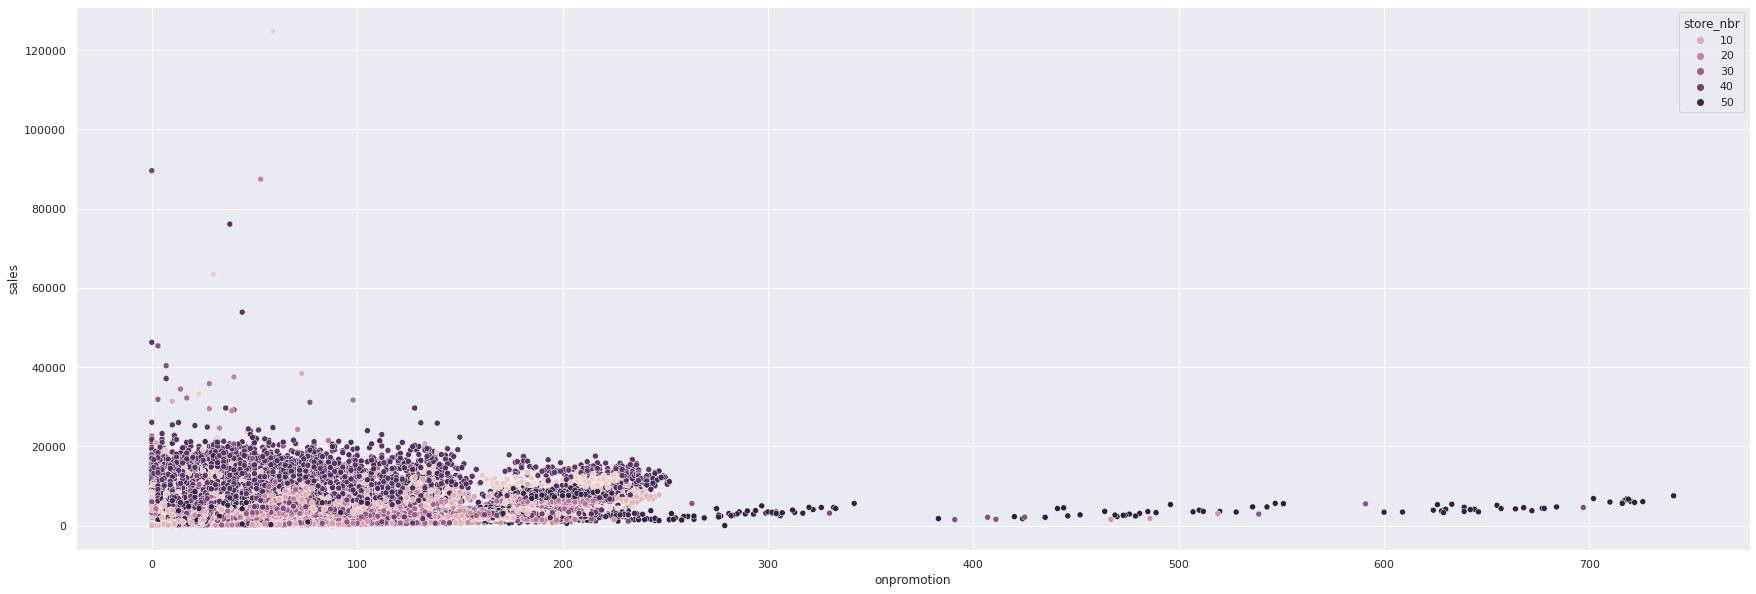

In [ ]:
sns.scatterplot(x=df_final['onpromotion'], 
                y=df_final['sales'],
                hue=df_final['store_nbr'])

<Axes: xlabel='dcoilwtico', ylabel='sales'>

/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


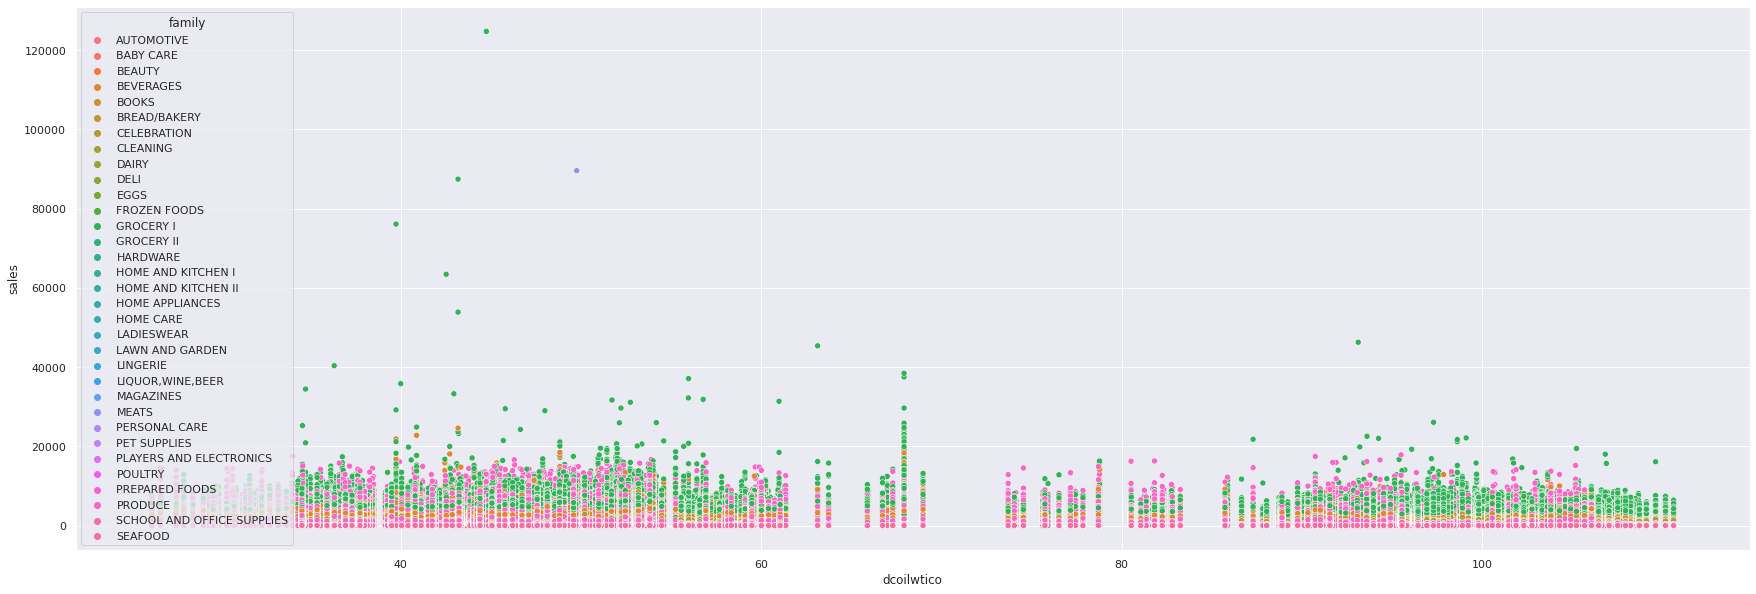

In [ ]:
sns.scatterplot(x=df_final['dcoilwtico'], 
                y=df_final['sales'],
                hue=df_final['family'])

In [16]:
df_final.family.unique()

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

In [18]:
frequent_promotionitems=['BEVERAGES',
       'BREAD/BAKERY', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I',
       'HOME CARE',
       'LIQUOR,WINE,BEER', 'MEATS', 'PERSONAL CARE', 'POULTRY', 'PRODUCE']
df_final['family_final']=df_final.family.apply(lambda x: x if x in frequent_promotionitems else 'others')

In [19]:
df_final.head()

,store_nbr,date,family,sales,onpromotion,dcoilwtico,family_final
0,1,2013-01-01,AUTOMOTIVE,0.0,0,67.925589,others
1,1,2013-01-01,BABY CARE,0.0,0,67.925589,others
2,1,2013-01-01,BEAUTY,0.0,0,67.925589,others
3,1,2013-01-01,BEVERAGES,0.0,0,67.925589,BEVERAGES
4,1,2013-01-01,BOOKS,0.0,0,67.925589,others


In [21]:
from sklearn.preprocessing import OneHotEncoder
cat_encoders={}
enc=OneHotEncoder(handle_unknown='ignore',sparse_output=False)
enc.fit(df_final[['family_final']])
print(enc.categories_)
result = enc.transform(df_final[['family_final']])
ohe_columns = ['family'+"_"+str(x) for x in enc.categories_[0]]
encode_frame=pd.DataFrame(result,columns=ohe_columns)
df_final=pd.concat([df_final,encode_frame],axis=1)
df_pf=df_final.drop(columns=['family','family_final'],axis=1)

[array(['BEVERAGES', 'BREAD/BAKERY', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'HOME CARE', 'LIQUOR,WINE,BEER',
       'MEATS', 'PERSONAL CARE', 'POULTRY', 'PRODUCE', 'others'],
      dtype=object)]


In [22]:
df_pf.set_index(['date','store_nbr'])

sales  onpromotion  dcoilwtico  family_BEVERAGES  \
date       store_nbr                                                        
2013-01-01 1             0.000            0   67.925589               0.0   
           1             0.000            0   67.925589               0.0   
           1             0.000            0   67.925589               0.0   
           1             0.000            0   67.925589               1.0   
           1             0.000            0   67.925589               0.0   
...                        ...          ...         ...               ...   
2017-08-15 9           438.133            0   47.570000               0.0   
           9           154.553            1   47.570000               0.0   
           9          2419.729          148   47.570000               0.0   
           9           121.000            8   47.570000               0.0   
           9            16.000            0   47.570000               0.0   

                      family_BREAD/BAKERY  family_CLEANING  family_DAIRY  \
date       store_nbr                                                       
2013-01-01 1                          0.0              0.0           0.0   
           1                          0.0              0.0           0.0   
           1                          0.0              0.0           0.0   
           1                          0.0              0.0           0.0   
           1                          0.0              0.0           0.0   
...                                   ...              ...           ...   
2017-08-15 9                          0.0              0.0           0.0   
           9                          0.0              0.0           0.0   
           9                          0.0              0.0           0.0   
           9                          0.0              0.0           0.0   
           9                          0.0              0.0           0.0   

                      family_DELI  family_EGGS  family_FROZEN FOODS  \
date       store_nbr                                                  
2013-01-01 1                  0.0          0.0                  0.0   
           1                  0.0          0.0                  0.0   
           1                  0.0          0.0                  0.0   
           1                  0.0          0.0                  0.0   
           1                  0.0          0.0                  0.0   
...                           ...          ...                  ...   
2017-08-15 9                  0.0          0.0                  0.0   
           9                  0.0          0.0                  0.0   
           9                  0.0          0.0                  0.0   
           9                  0.0          0.0                  0.0   
           9                  0.0          0.0                  0.0   

                      family_GROCERY I  family_HOME CARE  \
date       store_nbr                                       
2013-01-01 1                       0.0               0.0   
           1                       0.0               0.0   
           1                       0.0               0.0   
           1                       0.0               0.0   
           1                       0.0               0.0   
...                                ...               ...   
2017-08-15 9                       0.0               0.0   
           9                       0.0               0.0   
           9                       0.0               0.0   
           9                       0.0               0.0   
           9                       0.0               0.0   

                      family_LIQUOR,WINE,BEER  family_MEATS  \
date       store_nbr                                          
2013-01-01 1                              0.0           0.0   
           1                              0.0           0.0   
           1                              0.0           0.0   
           1  

First i will check the impact of promotions and catergories of various items on sales then impact of promotions on individual items to decided promotions acitivities for maximum profit from sales.

In [23]:
pip install linearmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.2/68.2 KB 7.4 MB/s eta 0:00:00


In [33]:
df_pf.set_index(['date','store_nbr'],inplace=True)
df_pf.columns

Index(['sales', 'onpromotion', 'dcoilwtico', 'family_BEVERAGES',
       'family_BREAD/BAKERY', 'family_CLEANING', 'family_DAIRY', 'family_DELI',
       'family_EGGS', 'family_FROZEN FOODS', 'family_GROCERY I',
       'family_HOME CARE', 'family_LIQUOR,WINE,BEER', 'family_MEATS',
       'family_PERSONAL CARE', 'family_POULTRY', 'family_PRODUCE',
       'family_others'],
      dtype='object')

In [36]:
import statsmodels.api as sm
from linearmodels.panel import PanelOLS
from linearmodels.panel import RandomEffects
var=['onpromotion', 'dcoilwtico', 'family_BEVERAGES',
       'family_BREAD/BAKERY', 'family_CLEANING', 'family_DAIRY', 'family_DELI',
       'family_EGGS', 'family_FROZEN FOODS', 'family_GROCERY I',
       'family_HOME CARE', 'family_LIQUOR,WINE,BEER', 'family_MEATS',
       'family_PERSONAL CARE', 'family_POULTRY', 'family_PRODUCE',
       'family_others']
exog=sm.tools.tools.add_constant(df_pf[var])
endo=df_pf.sales
# fixed effects model
model_fe = PanelOLS(endo, exog, entity_effects = True,drop_absorbed=True,check_rank=False)
fe_res = model_fe.fit() 
#print results
print(fe_res)

<ipython-input-36-e644d781da5f>:14: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

family_others, dcoilwtico

  fe_res = model_fe.fit()


                          PanelOLS Estimation Summary                           
Dep. Variable:                  sales   R-squared:                        0.5377
Estimator:                   PanelOLS   R-squared (Between):              0.3085
No. Observations:             3000888   R-squared (Within):               0.5377
Date:                Wed, Mar 22 2023   R-squared (Overall):              0.5344
Time:                        17:33:21   Log-likelihood                 -2.41e+07
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                   2.325e+05
Entities:                        1684   P-value                           0.0000
Avg Obs:                       1782.0   Distribution:              F(15,2999189)
Min Obs:                       1782.0                                           
Max Obs:                       1782.0   F-statistic (robust):          2.325e+05
                            

The sales of the articals that are frequently on promotions is very high as compared to items that are not on promotions as per our results.

In [43]:
df_others=df_pf[df_pf['family_others']==1][['sales','onpromotion','dcoilwtico']]

In [44]:
var=['onpromotion', 'dcoilwtico']
exog=sm.tools.tools.add_constant(df_others[var])
endo=df_others.sales
# fixed effects model
model_fe = PanelOLS(endo, exog, entity_effects = True,drop_absorbed=True,check_rank=False)
fe_res = model_fe.fit() 
#print results
print(fe_res)

<ipython-input-44-ccac6c6d0198>:6: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

dcoilwtico

  fe_res = model_fe.fit()


                          PanelOLS Estimation Summary                           
Dep. Variable:                  sales   R-squared:                        0.0345
Estimator:                   PanelOLS   R-squared (Between):              0.2941
No. Observations:             1727784   R-squared (Within):               0.0345
Date:                Wed, Mar 22 2023   R-squared (Overall):              0.0383
Time:                        17:41:42   Log-likelihood                -8.619e+06
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                   6.174e+04
Entities:                        1684   P-value                           0.0000
Avg Obs:                       1026.0   Distribution:               F(1,1726099)
Min Obs:                       1026.0                                           
Max Obs:                       1026.0   F-statistic (robust):          6.174e+04
                            

In [41]:
df_others.head()

sales  onpromotion
date       store_nbr                    
2013-01-01 1            0.0            0
           1            0.0            0
           1            0.0            0
           1            0.0            0
           1            0.0            0

In [50]:
df_final=df_final[['store_nbr',	'date',	'family',	'sales',	'onpromotion',	'dcoilwtico']]

In [51]:
frame_name=[]
for i in df_final.family.unique():
  frame_name.append('df_final'+'_'+i)

In [52]:
df_final.head()

,store_nbr,date,family,sales,onpromotion,dcoilwtico
0,1,2013-01-01,AUTOMOTIVE,0.0,0,67.925589
1,1,2013-01-01,BABY CARE,0.0,0,67.925589
2,1,2013-01-01,BEAUTY,0.0,0,67.925589
3,1,2013-01-01,BEVERAGES,0.0,0,67.925589
4,1,2013-01-01,BOOKS,0.0,0,67.925589


In [53]:
for i in range(len(frame_name)):
  frame_name[i]=df_final[df_final['family']==df_final.family.unique()[i]]

In [57]:
print(frame_name[12])

         store_nbr       date     family     sales  onpromotion  dcoilwtico
12               1 2013-01-01  GROCERY I     0.000            0   67.925589
45              10 2013-01-01  GROCERY I     0.000            0   67.925589
78              11 2013-01-01  GROCERY I     0.000            0   67.925589
111             12 2013-01-01  GROCERY I     0.000            0   67.925589
144             13 2013-01-01  GROCERY I     0.000            0   67.925589
...            ...        ...        ...       ...          ...         ...
3000735         54 2017-08-15  GROCERY I  4235.000           44   47.570000
3000768          6 2017-08-15  GROCERY I  4334.000           33   47.570000
3000801          7 2017-08-15  GROCERY I  3678.000           34   47.570000
3000834          8 2017-08-15  GROCERY I  4035.000           34   47.570000
3000867          9 2017-08-15  GROCERY I  6630.383           62   47.570000

[90936 rows x 6 columns]


I want to predict the impact of onpromotion and oil price on sales of various products. As it is panel data first i will proceed with pooled estimates if it satisfy the assusmptions for reliable and best estimates.

In [58]:
frame_name[12].head()

,store_nbr,date,family,sales,onpromotion,dcoilwtico
12,1,2013-01-01,GROCERY I,0.0,0,67.925589
45,10,2013-01-01,GROCERY I,0.0,0,67.925589
78,11,2013-01-01,GROCERY I,0.0,0,67.925589
111,12,2013-01-01,GROCERY I,0.0,0,67.925589
144,13,2013-01-01,GROCERY I,0.0,0,67.925589


In [59]:
from linearmodels import PooledOLS
import statsmodels.api as sm
frame_name[12].set_index(['date','store_nbr'])
#frame_name[12].drop(columns=['family'],axis=1,inplace=True)
exog=sm.tools.tools.add_constant(frame_name[12][['onpromotion',	'dcoilwtico']])
e=frame_name[12]['sales']



In [60]:
mod = sm.OLS(e, exog)
pooledOLS_res = mod.fit()
# Store values for checking homoskedasticity graphically
print(pooledOLS_res.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     3917.
Date:                Wed, 22 Mar 2023   Prob (F-statistic):               0.00
Time:                        17:51:10   Log-Likelihood:            -8.4945e+05
No. Observations:               90936   AIC:                         1.699e+06
Df Residuals:                   90933   BIC:                         1.699e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3776.9757     35.926    105.133      

In [67]:
fitted_values = pd.Series(pooledOLS_res.fittedvalues, name="Fitted Values")
residuals = pd.Series(pooledOLS_res.resid, name="S. Residuals")

In [68]:
print(fitted_values)

12         3309.274830
45         3309.274830
78         3309.274830
111        3309.274830
144        3309.274830
              ...     
3000735    4426.737097
3000768    4182.411077
3000801    4204.622533
3000834    4204.622533
3000867    4826.543313
Name: Fitted Values, Length: 90936, dtype: float64


In [70]:
print(residuals)

12        -3309.274830
45        -3309.274830
78        -3309.274830
111       -3309.274830
144       -3309.274830
              ...     
3000735    -191.737097
3000768     151.588923
3000801    -526.622533
3000834    -169.622533
3000867    1803.839687
Name: S. Residuals, Length: 90936, dtype: float64


#Important assumptions for significant and blue estimates are:
1. Linearity : indepent variables are linearly related to dependent variables
2.(i)Homoeskedicity : that the error has constant variable with respect to each indepedent variable. if heteroskedicity is there than ols may not lead to best linear unbaised estimates. It can be resolved by adding weight in loss function. using ols in heteroskedicity may lead to non relaible insignificant coefficient estimation.
 (ii) and each data point is independent of each other no autocorrelation
3.Endogenity : that the error term must be uncorrelated to independent variables as correlation can lead to ommitted variable bias in estiamted coefficient.
4.No mutilcolinearity : there must be no linear correlation in independent variable as having that may lead to standard error and insignificant coefficient
#If in pooled regression 2 and 3 are voilated we can apply fixed effects or random effects for the data

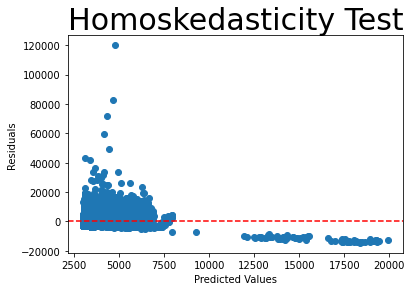

In [71]:
# 3A. Homoskedasticity
import matplotlib.pyplot as plt
 # 3A.1 Residuals-Plot for growing Variance Detection
plt.scatter(fitted_values, residuals)
plt.axhline(0, color = 'r', ls = '--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Homoskedasticity Test', fontsize = 30)
plt.show()

# There seems heteroskedecity but we will confirm it using White- and the Breusch-Pagan-Test:

In [76]:
# 3A.2 White-Test
from statsmodels.stats.diagnostic import het_white, het_breuschpagan
pooled_OLS_dataset = pd.concat([frame_name[12], residuals], axis=1)
exog = sm.tools.tools.add_constant(pooled_OLS_dataset[['onpromotion',	'dcoilwtico']]).fillna(0)
white_test_results = het_white(pooled_OLS_dataset['S. Residuals'], exog)
labels = ['LM-Stat', 'LM p-val', 'F-Stat', 'F p-val'] 
print(dict(zip(labels, white_test_results)))
# 3A.3 Breusch-Pagan-Test
breusch_pagan_test_results = het_breuschpagan(pooled_OLS_dataset['S. Residuals'], exog)
print(dict(zip(labels, breusch_pagan_test_results)))
#as for both test p value is less than .05 hence heteroscedicity is there


{'LM-Stat': 595.7221813976608, 'LM p-val': 1.6987975385502448e-126, 'F-Stat': 119.92218590086173, 'F p-val': 6.502626929975641e-127}
{'LM-Stat': 338.09232438537504, 'LM p-val': 3.83870353643109e-74, 'F-Stat': 169.67140920855226, 'F p-val': 2.8170528141311337e-74}


In [77]:
# 3.B Non-Autocorrelation
# Durbin-Watson-Test
from statsmodels.stats.stattools import durbin_watson
durbin_watson_test_results = durbin_watson(pooled_OLS_dataset['S. Residuals']) 
print(durbin_watson_test_results)
# as the value of test is lessthan 2 hence residuals are positively correlated. as the assumptions of ols are voilated so fixed or random effect model may be more suitable for this panel data 

1.0213867294252805


In [100]:
frame_name[12].reset_index(inplace=True)

In [92]:
print(frame_name[12]['onpromotion'].corr(frame_name[12]['dcoilwtico']))

-0.39807718565803873


In [103]:
from linearmodels.panel import PanelOLS
from linearmodels.panel import RandomEffects
frame_name[12].set_index(['date','store_nbr'],inplace=True)
var=['onpromotion','dcoilwtico']
exog=sm.tools.tools.add_constant(frame_name[12][var])
endo=frame_name[12].sales
# fixed effects model
model_fe = PanelOLS(endo, exog, entity_effects = True,drop_absorbed=True)
fe_res = model_fe.fit() 
#print results
print(fe_res)

<ipython-input-103-19c9e6e90000>:9: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

dcoilwtico

  fe_res = model_fe.fit()


                          PanelOLS Estimation Summary                           
Dep. Variable:                  sales   R-squared:                        0.0455
Estimator:                   PanelOLS   R-squared (Between):              0.2081
No. Observations:               90936   R-squared (Within):               0.0455
Date:                Wed, Mar 22 2023   R-squared (Overall):              0.0713
Time:                        18:02:57   Log-likelihood                -8.432e+05
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      4253.5
Entities:                        1684   P-value                           0.0000
Avg Obs:                       54.000   Distribution:                 F(1,89251)
Min Obs:                       54.000                                           
Max Obs:                       54.000   F-statistic (robust):             4253.5
                            

#I used fixed effect model to find the impact of promotions and oil price on sales of groceryI (mostly on onpromotions) and other non so frequently on promotions items together at various stores.
As all stores are located in different parts of ecuador there may be some unmeasaured factors infuencing promotions and oil prices as well as sales of some stores. So simple pooled regression may lead to baised coefficient hence not giving the true impact of promotions of sales on various stores in this panel data and i proved it first by running just pooled model whose estimates were biased. Also i considered that the these store based impact is not changing with time.
Remark : though it is impact that this impact may vary with time as well. In that case we will apply random effect model. It can depend on business, markets, time and entities.

#Important outcomes of my analysis were :

1. Sales of items more frequently on sales is satistically significantly higher than items not on promotions that frequently across various stores.
2. Impact of promotions on items not that frequently on promotions is almost one third of items that are frequently on sales.
3. The items on sales are  mostly pershable having expiry dates.



# Now i will forecast the total sales of automobile in Ecuador for the store chain


In [14]:
df_final.head()

,store_nbr,date,index,family,sales,onpromotion,dcoilwtico
0,1,2013-01-01,0,AUTOMOTIVE,0.0,0,67.925589
1,1,2013-01-01,1,BABY CARE,0.0,0,67.925589
2,1,2013-01-01,2,BEAUTY,0.0,0,67.925589
3,1,2013-01-01,3,BEVERAGES,0.0,0,67.925589
4,1,2013-01-01,4,BOOKS,0.0,0,67.925589


In [15]:
df_final.family.unique()

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

In [16]:
df_a=df_final[df_final['family']=='AUTOMOTIVE']

In [41]:
df_a.dtypes

store_nbr               int64
date           datetime64[ns]
index                   int64
family                 object
sales                 float64
onpromotion             int64
dcoilwtico            float64
dtype: object

In [43]:
df_af=pd.DataFrame(df_a.groupby('date')['sales'].sum())

In [44]:
df_af.head()

,sales
date,
2013-01-01,0.0
2013-01-02,255.0
2013-01-03,161.0
2013-01-04,169.0
2013-01-05,342.0


In [45]:
type(df_af.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [47]:
df_af.index = pd.DatetimeIndex(df_af.index).to_period('D')

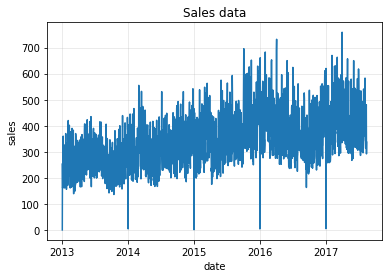

<Figure size 720x720 with 0 Axes>

In [19]:
import matplotlib.pyplot as plt
plt.plot('sales',data=df_af)
plt.title("Sales data")
plt.xlabel("date")
plt.ylabel("sales")
plt.grid(alpha=0.3)
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose
ss_decomposition = seasonal_decompose(x=df_af, model='additive',period=1)
estimated_trend = ss_decomposition.trend
estimated_seasonal = ss_decomposition.seasonal
estimated_residual = ss_decomposition.resid

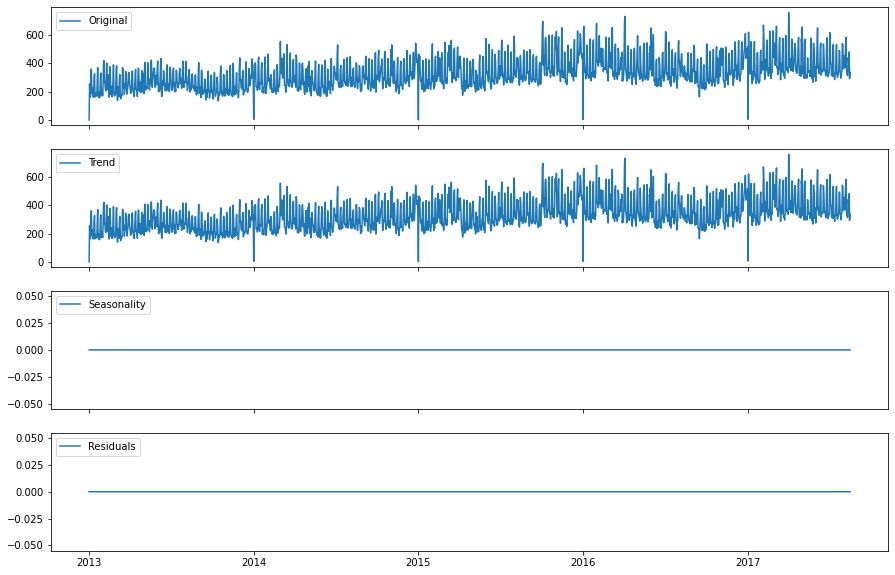

In [21]:
fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(15)

axes[0].plot(df_af, label='Original')
axes[0].legend(loc='upper left');

axes[1].plot(estimated_trend, label='Trend')
axes[1].legend(loc='upper left');

axes[2].plot(estimated_seasonal, label='Seasonality')
axes[2].legend(loc='upper left');

axes[3].plot(estimated_residual, label='Residuals')
axes[3].legend(loc='upper left');

It seems this time series has no seasonality but we see a trend. we will check it further

In [50]:
from statsmodels.tsa.stattools import adfuller

adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(df_af)

In [51]:
print([adf, pvalue, usedlag, nobs, critical_values, icbest])

[-3.2290887443448306, 0.018361456117775534, 23, 1660, {'1%': -3.4342954463097706, '5%': -2.8632826898390484, '10%': -2.5676977663666714}, 18332.86325235687]


#Here in plotting I can see a trend but adfuller test is showing stationarty. One way of overcoming this problem is taking log of time series

This is an important lesson: Plotting is a useful tool because some statistical tests like ADF have low power, meaning they either need lots and lots of data or they may incorrecly reject the null hypothesis when in fact the null is true.

In [52]:
import numpy as np
df_af['log_sales']=df_af['sales'].apply(lambda x : np.log(x) if x!=0 else 0)

In [53]:
df_af.head()

,sales,log_sales
date,,
2013-01-01,0.0,0.000000
2013-01-02,255.0,5.541264
2013-01-03,161.0,5.081404
2013-01-04,169.0,5.129899
2013-01-05,342.0,5.834811


I want to check the mean and variance of sales in various months and years

<Axes: xlabel='date', ylabel='sales'>

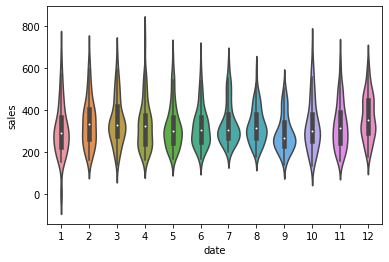

In [32]:
import seaborn as sns
sns.violinplot(x=df_af.index.month, y=df_af.sales)

<Axes: xlabel='date', ylabel='sales'>

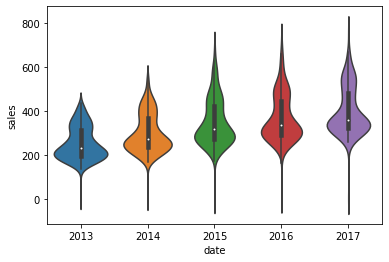

In [33]:
import seaborn as sns
sns.violinplot(x=df_af.index.year, y=df_af.sales)

<Axes: xlabel='date', ylabel='log_sales'>

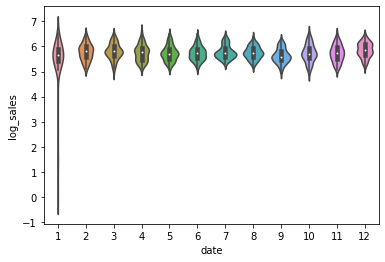

In [34]:
import seaborn as sns
sns.violinplot(x=df_af.index.month, y=df_af.log_sales)

<Axes: xlabel='date', ylabel='log_sales'>

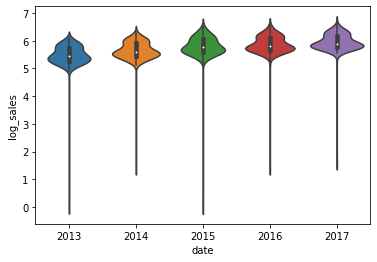

In [35]:
import seaborn as sns
sns.violinplot(x=df_af.index.year, y=df_af.log_sales)

So log of the sales seems to have constant mean and variance but their ouliers are varying

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose
ss_decomposition = seasonal_decompose(x=df_af.log_sales, model='additive',period=1)
estimated_trend = ss_decomposition.trend
estimated_seasonal = ss_decomposition.seasonal
estimated_residual = ss_decomposition.resid

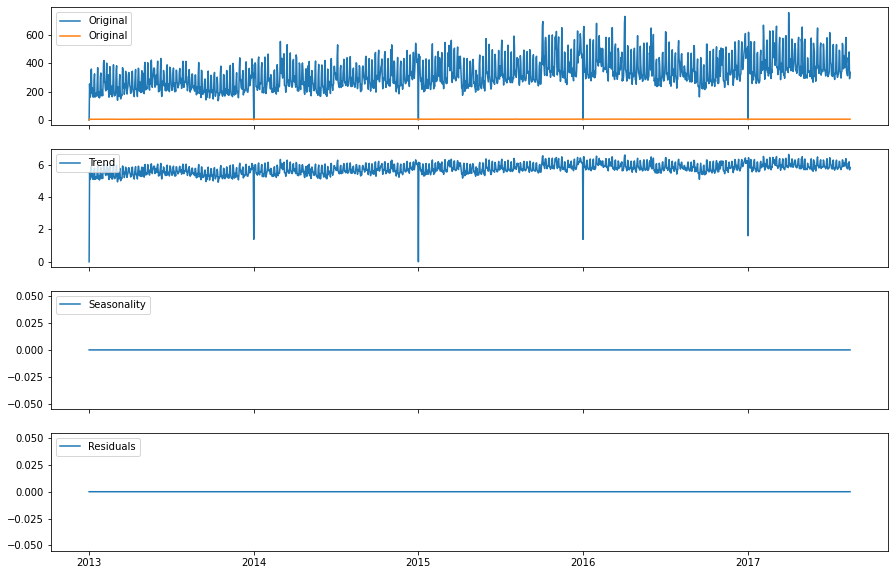

In [27]:
fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(15)

axes[0].plot(df_af, label='Original')
axes[0].legend(loc='upper left');

axes[1].plot(estimated_trend, label='Trend')
axes[1].legend(loc='upper left');

axes[2].plot(estimated_seasonal, label='Seasonality')
axes[2].legend(loc='upper left');

axes[3].plot(estimated_residual, label='Residuals')
axes[3].legend(loc='upper left');

Now we can see a lack of trend in log series a compared to sales series previously 

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


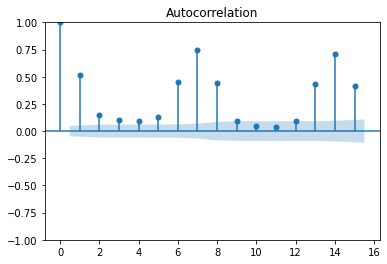

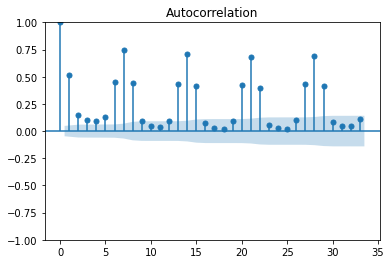

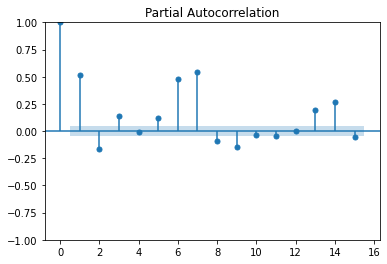

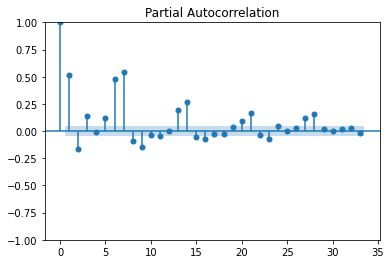

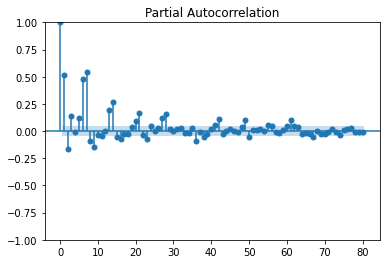

In [48]:
import statsmodels.api as sm
sm.tsa.graphics.plot_acf(df_af.sales,lags=15)
sm.tsa.graphics.plot_acf(df_af.sales)
sm.tsa.graphics.plot_pacf(df_af.sales,lags=15)
sm.tsa.graphics.plot_pacf(df_af.sales)
sm.tsa.graphics.plot_pacf(df_af.sales,lags=80);

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


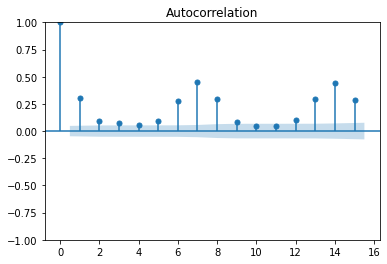

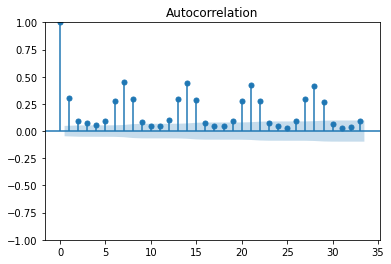

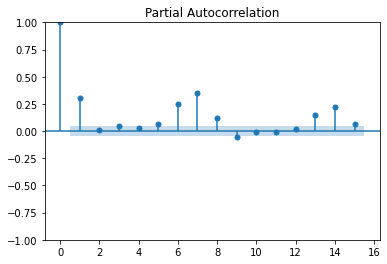

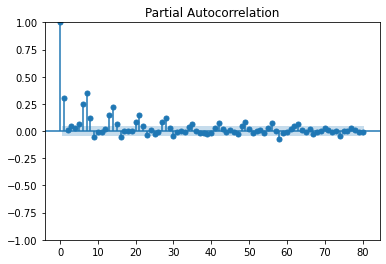

In [54]:
sm.tsa.graphics.plot_acf(df_af.log_sales,lags=15)
sm.tsa.graphics.plot_acf(df_af.log_sales)
sm.tsa.graphics.plot_pacf(df_af.log_sales,lags=15)
sm.tsa.graphics.plot_pacf(df_af.log_sales,lags=80);

There seems seasonality with acf and pacf plot so i will use differencing 

In [249]:
diff_data = df_af.log_sales.diff().dropna()

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


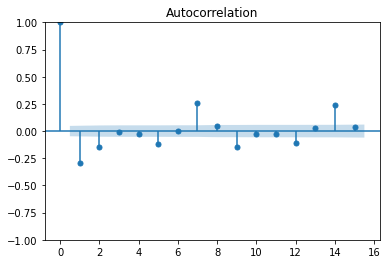

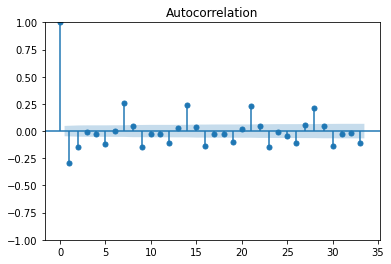

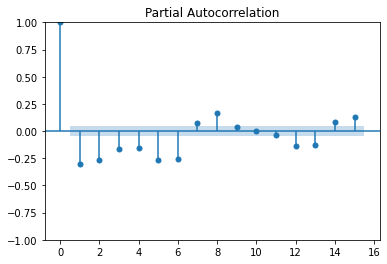

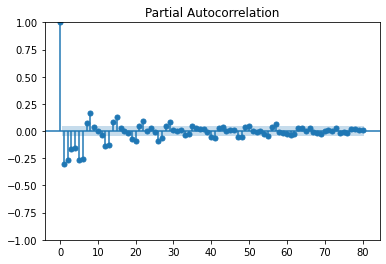

In [251]:
sm.tsa.graphics.plot_acf(diff_data,lags=15)
sm.tsa.graphics.plot_acf(diff_data)
sm.tsa.graphics.plot_pacf(diff_data,lags=15)
sm.tsa.graphics.plot_pacf(diff_data,lags=80);

As pacf plot is gradually becoming zero. Also in acf plot seasonal part is not becoming zero and initial part are becoming zero after two steps
so we will use ar(2) and 
for seasonality we will use D=1 and (1,1,1,3) model and there are three steps in one season

In [55]:
def res_plot(data, lags=None):
    import seaborn as sns
    layout = (1, 2)
    acf  = plt.subplot2grid(layout, (0, 0))
    pacf = plt.subplot2grid(layout, (0, 1))
    sm.tsa.graphics.plot_acf(data, lags=lags, ax=acf, zero=False)
    sm.tsa.graphics.plot_pacf(data, lags=lags, ax=pacf, zero = False)
    sns.despine()
    plt.tight_layout()

In [276]:
sar = sm.tsa.statespace.SARIMAX(df_af.log_sales, 
                                order=(0,1,1), 
                                seasonal_order=(1,1,0,7),enforce_stationarity=False, enforce_invertibility=False,seasonal_order2=(1,1,0,3)).fit()
sar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          log_sales   No. Observations:                 1684
Model:             SARIMAX(0, 1, 1)x(1, 1, [], 7)   Log Likelihood                -590.960
Date:                            Wed, 22 Mar 2023   AIC                           1187.920
Time:                                    02:42:04   BIC                           1204.180
Sample:                                01-01-2013   HQIC                          1193.945
                                     - 08-15-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0000      1.199     -0.834      0.404      -3.350       1.350
ar.S.L7       -0.4457      0.004   -119.669      0.000      -0.453      -0.438
sigma2         0.1183      0.142      0.833      0.405      -0.160       0.397
===================================================================================
Ljung-Box (L1) (Q):                   4.68   Jarque-Bera (JB):            792292.79
Prob(Q):                              0.03   Prob(JB):                         0.00
Heteroskedasticity (H):               1.07   Skew:                            -5.24
Prob(H) (two-sided):                  0.45   Kurtosis:                       109.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


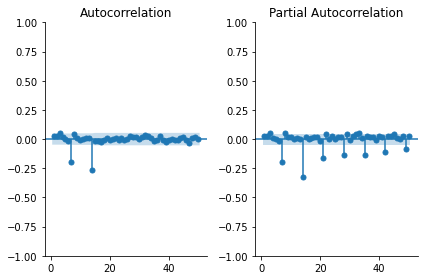

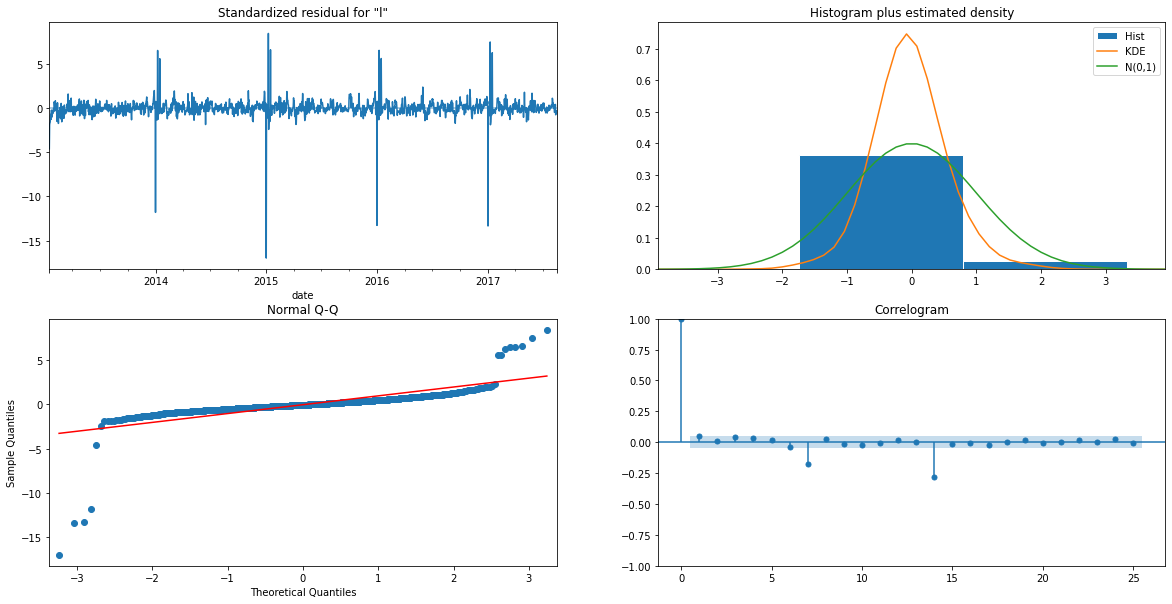

In [277]:
res_plot(sar.resid, lags=50);
sar.plot_diagnostics(lags=25,figsize = (20,10),);

In [278]:
sar = sm.tsa.statespace.SARIMAX(df_af.log_sales, 
                                order=(0,1,1), 
                                seasonal_order=(1,1,1,7),enforce_stationarity=False, enforce_invertibility=False,seasonal_order2=(1,1,0,3)).fit()
sar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                         log_sales   No. Observations:                 1684
Model:             SARIMAX(0, 1, 1)x(1, 1, 1, 7)   Log Likelihood                -351.448
Date:                           Wed, 22 Mar 2023   AIC                            710.896
Time:                                   02:42:49   BIC                            732.571
Sample:                               01-01-2013   HQIC                           718.928
                                    - 08-15-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9710      0.007   -148.604      0.000      -0.984      -0.958
ar.S.L7    -4.857e-06      0.003     -0.002      0.999      -0.005       0.005
ma.S.L7       -0.8872      0.011    -78.576      0.000      -0.909      -0.865
sigma2         0.0887      0.001    138.897      0.000       0.087       0.090
===================================================================================
Ljung-Box (L1) (Q):                   2.96   Jarque-Bera (JB):           1924613.67
Prob(Q):                              0.09   Prob(JB):                         0.00
Heteroskedasticity (H):               1.13   Skew:                            -9.86
Prob(H) (two-sided):                  0.14   Kurtosis:                       168.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


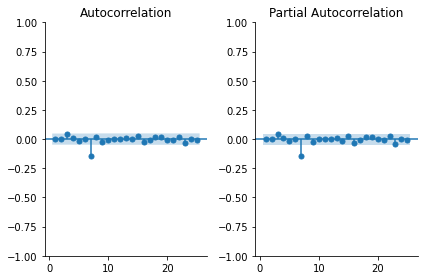

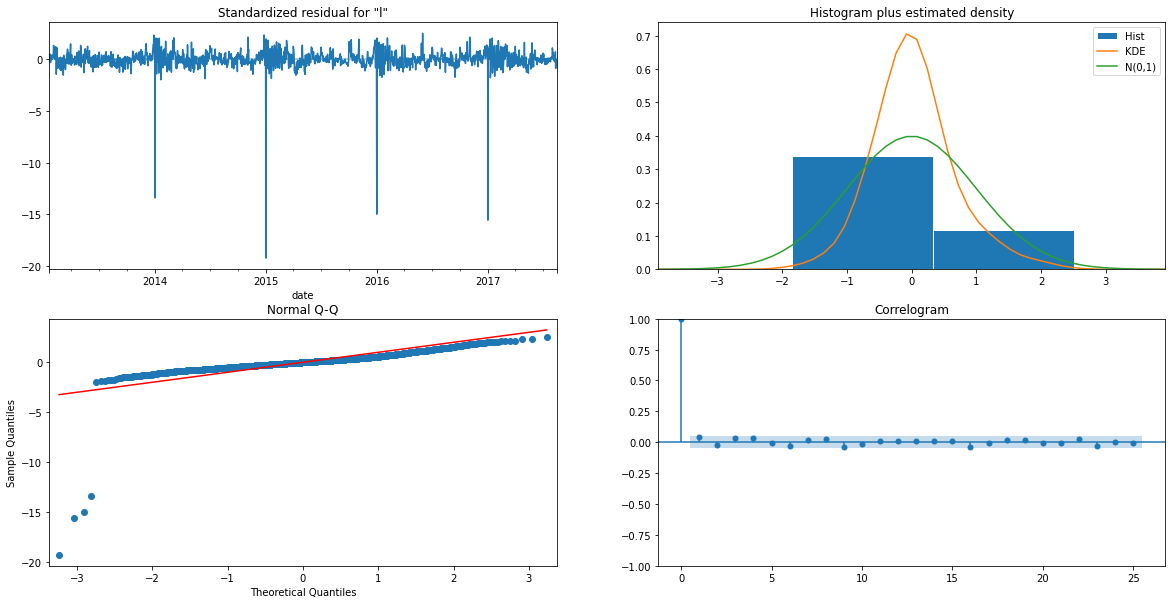

In [279]:
res_plot(sar.resid, lags=25);
sar.plot_diagnostics(lags=25,figsize = (20,10),);

In [298]:
sar = sm.tsa.statespace.SARIMAX(df_af.log_sales, 
                                order=(1,1,1), 
                                seasonal_order=(1,1,1,7),enforce_stationarity=False, enforce_invertibility=False,seasonal_order2=(1,1,1,3)).fit()
sar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                         log_sales   No. Observations:                 1599
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood                -368.726
Date:                           Wed, 22 Mar 2023   AIC                            747.453
Time:                                   02:57:31   BIC                            774.285
Sample:                               01-01-2013   HQIC                           757.422
                                    - 05-22-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0480      0.014      3.389      0.001       0.020       0.076
ma.L1         -0.9775      0.006   -153.496      0.000      -0.990      -0.965
ar.S.L7        0.0183      0.020      0.940      0.347      -0.020       0.057
ma.S.L7       -0.8897      0.015    -58.621      0.000      -0.919      -0.860
sigma2         0.0925      0.001    140.463      0.000       0.091       0.094
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           1705651.53
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.83   Skew:                            -9.73
Prob(H) (two-sided):                  0.00   Kurtosis:                       162.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


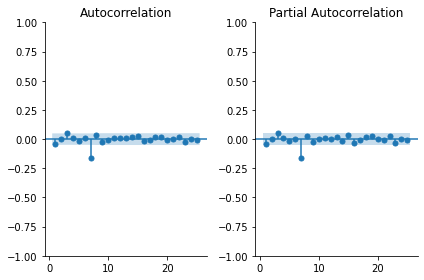

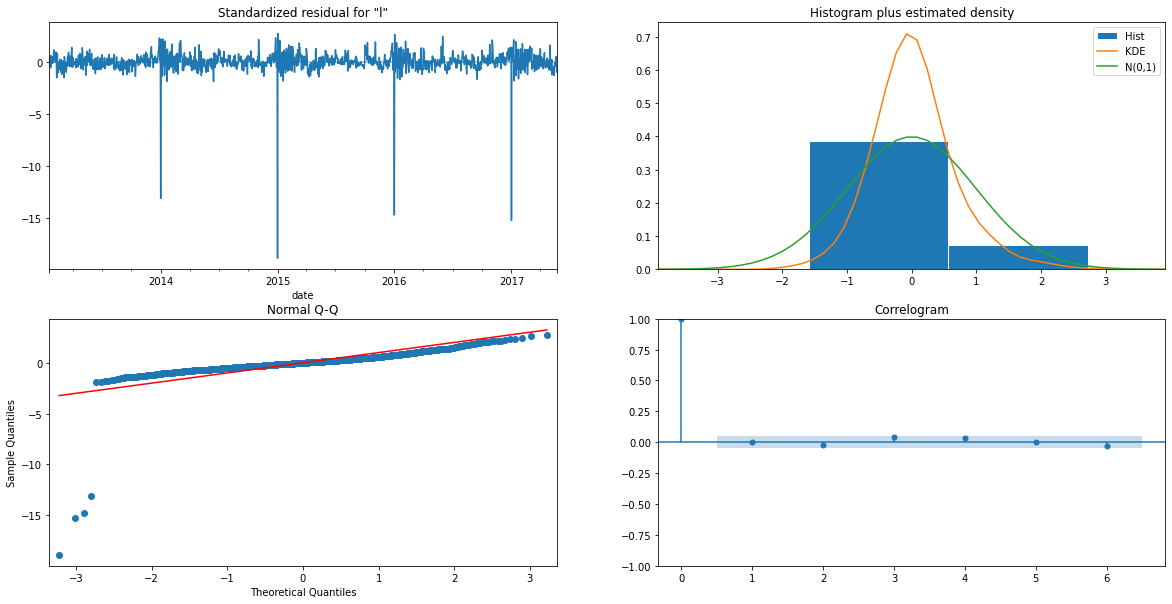

In [299]:
res_plot(sar.resid, lags=25);
sar.plot_diagnostics(lags=6,figsize = (20,10),);

In [349]:
X = df_af.log_sales.values
size = int(len(X) * 0.9)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation

In [350]:
for t in range(len(test)):
 model = sm.tsa.statespace.SARIMAX(history, 
                                order=(1,1,1), 
                                seasonal_order=(1,1,1,7),enforce_stationarity=False, enforce_invertibility=False,seasonal_order2=(1,1,1,3)).fit(maxiter=3000)
 try:
  output = model.forecast()
  yhat = output[0]
  predictions.append(yhat)
  obs = test[t]
  history.append(obs)
 except:
   obs = test[t]
   del test[t]
   history.append(obs)


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [359]:
def mean_absolute_percentage_error(true, pred):
    import numpy as np
    abs_error = (np.abs(true - pred)) / true
    sum_abs_error = np.sum(abs_error)
    mape_loss = (sum_abs_error / true.size) * 100
    return mape_loss

Test RMSE: 0.149
Test MAPE: %.3f 1.85%


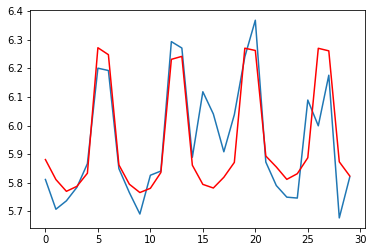

In [366]:
from sklearn.metrics import mean_squared_error
import numpy as np
#calculate root mean square error
rmse = np.sqrt(mean_squared_error(test, predictions))
mape=round(mean_absolute_percentage_error(test,predictions),2)
print('Test RMSE: %.3f' % rmse)
print(f'Test MAPE: %.3f {mape}%')
# plot forecasts against actual outcomes
plt.plot(test[-30:])
plt.plot(predictions[-30:], color='red')
plt.show()

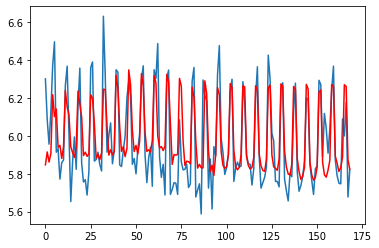

In [361]:
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [352]:
norm_val, norm_p, skew, kurtosis = model.test_normality('jarquebera')[0]
lb_val, lb_p = model.test_serial_correlation(method='ljungbox',)[0]
het_val, het_p = model.test_heteroskedasticity('breakvar')[0]

In [176]:
model.test_serial_correlation?
#null hypothesis no serial correlation

In [178]:
model.test_heteroskedasticity?
#null hypothesis is no heterodasticity

In [179]:
model.test_normality?
# null hypothesis is normality

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


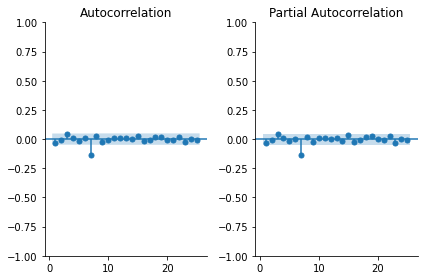

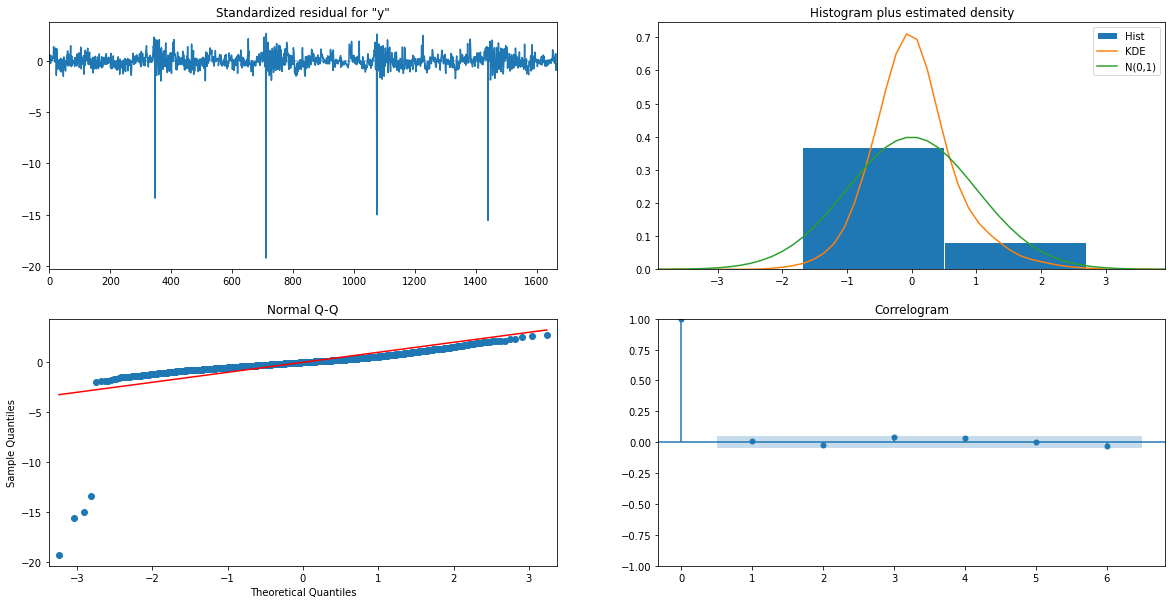

In [354]:
res_plot(model.resid, lags=25);
model.plot_diagnostics(lags=6,figsize = (20,10),);

In [353]:
lb_val = lb_val[-1]
lb_p = lb_p[-1]
durbin_watson = sm.stats.stattools.durbin_watson(
    model.filter_results.standardized_forecasts_error[0, model.loglikelihood_burn:])

print('Normality: val={:.3f}, p={:.3f}'.format(norm_val, norm_p));
print('Ljung-Box: val={:.3f}, p={:.3f}'.format(lb_val, lb_p));
print('Heteroskedasticity: val={:.3f}, p={:.3f}'.format(het_val, het_p));
print('Durbin-Watson: d={:.2f}'.format(durbin_watson))

Normality: val=1921669.340, p=0.000
Ljung-Box: val=12.539, p=0.563
Heteroskedasticity: val=1.129, p=0.154
Durbin-Watson: d=1.99
